<h1>Multiple Linear Regression</h1>



Once again we'll start with some basic packages and reading in our data.

In [35]:
import pandas as pd
import numpy as np

In [36]:
df = pd.read_csv('sample_data/ex1data2.csv')
df.head()

,Size of the House,Number of Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


Because we have more than two features, we're going to do a correlation matrix instead of a single scatterplot to show us the relationship between all of the features in the dataset. Seaborn uses the Pearson correlation coefficient which returns values ranging from -1 to 1 depending on whether the linear relationship is negative or positive

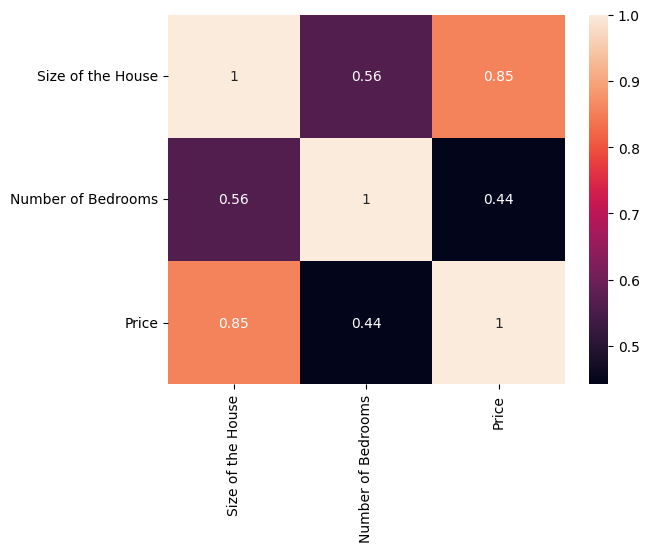

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
#plotting the heatmap for correlation
ax = sns.heatmap(df.corr(), annot=True)

All of the relationships appear to be positive with the strongest being between size of the house and price. Lets do some quick checks for missing values and scale.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Size of the House   47 non-null     int64
 1   Number of Bedrooms  47 non-null     int64
 2   Price               47 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB


In [39]:
df.describe()

,Size of the House,Number of Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


No missing values, but lets scale our data since they are pretty different.

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(df)

In [41]:
X, y = scaled[:, :-1], scaled[:, -1]

Now we can split our data into train/test and fit

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)

From here we can fit the model using the training data

In [56]:
from sklearn.linear_model import LinearRegression

#Fitting the Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Now we can get the score of the model using the test data. Sklearn uses the coefficient of determination or r-squared as its model scoring metric.  This metric measures the amount of variation in the dependent variable that can be explained by the dependent ones.

In [57]:
print(model.score(X_test, y_test))

0.6801332012806119


We can also view the intercapt and coefficient values.  As expected based on the correlation matrix the size of the house has a bigger impact on the modeled feature of price than the number of bedrooms does.

In [70]:
#Intercept and Coefficient
print("Intercept: ", model.intercept_)
print("Coefficients:")
print(model.coef_)

Intercept:  0.014132435159113279
Coefficients:
[0.86483548 0.02628379]


We can then use the model we fit to get the predicted values for all of the text set.

In [66]:
#Prediction of test set
y_pred_model= model.predict(X_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_model))

Prediction for test set: [ 1.17647013 -0.82967129  0.2274441   0.02585337 -0.83297134 -0.67456903
  0.22055621 -0.02364735  2.4788891  -0.50516657 -0.79777083  0.0074409
  0.6660627   1.14236963 -0.43256551 -0.77548271]


From here we can compare the predictions from the actual ground truth values for the test set to observe the errors.

In [68]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_model})
mlr_diff.head()

,Actual value,Predicted value
0,2.090396,1.176470
1,-0.893374,-0.829671
2,1.087992,0.227444
3,-0.327501,0.025853
4,-1.135892,-0.832971


Now that we have the prdictions we can also get some additional evaluation metrics:  MAE, MSE and RMSE. Each of the these are different ways of measuring the distance between each prediction and the ground truth value.


In [74]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_model)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_model)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_model))
print('R squared: {:.2f}'.format(model.score(X_test, y_test)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 68.01
Mean Absolute Error: 0.4830083949594395
Mean Square Error: 0.3145596410806807
Root Mean Square Error: 0.5608561679082086
